In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

f = 301.7 mm


d = 95.0 - 48.9 mm

In [ ]:
task1 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/Task1.csv')
task1_log = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/Task1log.csv')
task2 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/Task2.csv')
task2_log = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/Task2log.csv')
f = 301.7*10*(-3)
lamb = 635*10**(-9)

In [ ]:
#creating arrays
task2_pos = np.array(task2['Pixel index'])*7 -10514.0 #micrometers
task2_int = np.array(task2['Intensity'])
task2_log_pos = np.array(task2_log['Pixel index'])
task2_log_int = np.array(task2_log['Intensity'])
task2_pos[-1],task2_pos[0]

(10486.0, -10507.0)

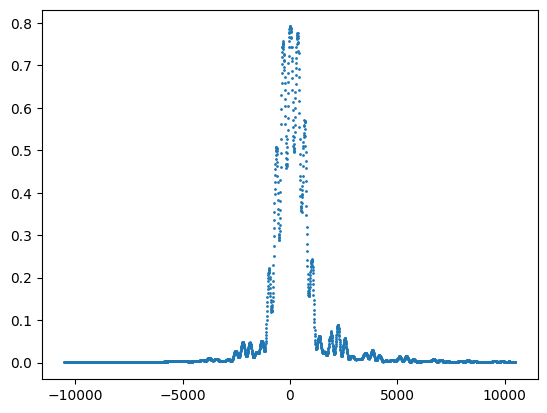

In [ ]:
plt.scatter(task2_pos,task2_int,s = 1)


In [ ]:
peak, _ = find_peaks(task2_int, distance = 10000)
task2_int[peak[0]],task2_pos[peak[0]]

(0.79147345, 0.0)

In [ ]:
peaks2, _ = find_peaks(-task2_int, distance = 40)
peaks2 = peaks2[17:36]

In [ ]:
for i in peaks2:
  print(task2_pos[i])

-3577.0
-3220.0
-2744.0
-2380.0
-2030.0
-1694.0
-1183.0
-861.0
-511.0
-161.0
182.0
539.0
875.0
1225.0
1708.0
2065.0
2408.0
2744.0
3066.0


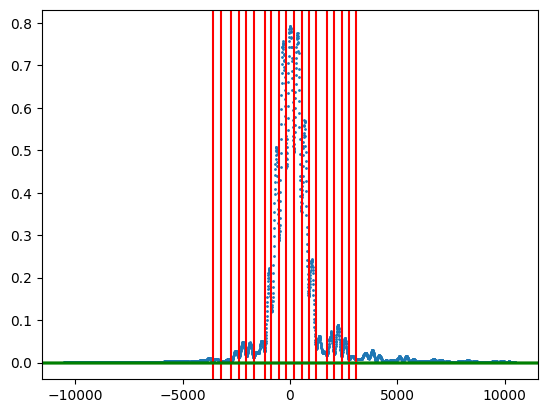

In [ ]:
plt.scatter(task2_pos,task2_int,s = 1)
for i in peaks2:
  plt.axvline(task2_pos[i], c = 'r')
  plt.axhline(0, c = 'g')

In [ ]:
len(peaks2)

19

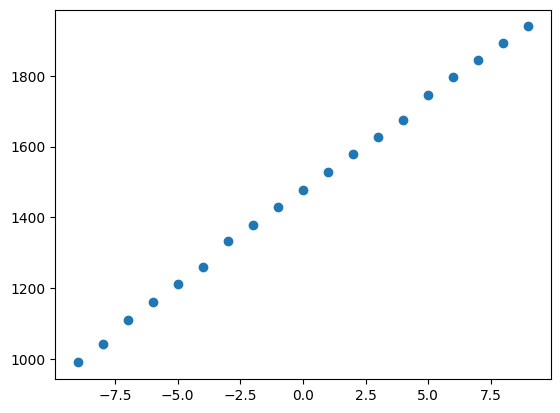

In [ ]:
orders = np.arange(-9,10)
plt.scatter(orders, peaks2)


$$x_n^{\min } \approx(2 n-1) \frac{\lambda}{2} \frac{f}{g}=n \frac{\lambda f}{g}-\frac{\lambda f}{2 g}$$

In [ ]:
def line(x,a,b):
  return a*x + b

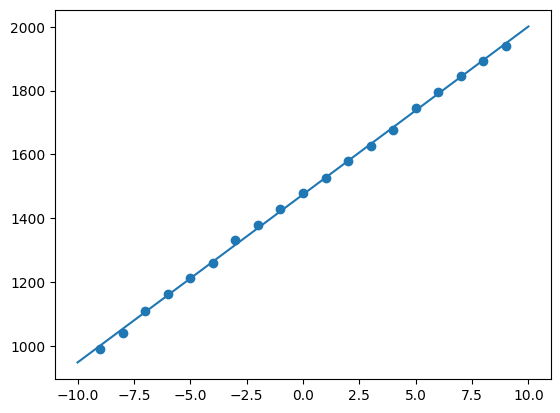

In [ ]:
popt2, pcov2 = curve_fit(line, orders, peaks2, p0 = [600,1100])
o = np.linspace(-10,10,100)
plt.scatter(orders, peaks2)

plt.plot(o, line(o,popt2[0],popt2[1]))


$$x_n^{\min } \approx(2 n-1) \frac{\lambda}{2} \frac{f}{g}=n \frac{\lambda f}{g}-\frac{\lambda f}{2 g}$$

In [ ]:
g1 = 635*10**(-9)*301.7*10**(-3)/popt2[0] *10**(6)
g1

0.0036354056529220883

In [ ]:
task2_pos[peaks2[5]],task2_pos[peaks2[14]]
#these are the positions of the minima of orders -1 and 1 of the envelope
x_avg = (-task2_pos[peaks2[5]]+task2_pos[peaks2[14]])/2
x_avg,task2_pos[peaks2[5]],task2_pos[peaks2[14]]

(1701.0, -1694.0, 1708.0)

In [ ]:
b1 = 1* 635*10**(-9)*301.7*10**(-3)/1701.0 * 10**6
b1

0.00011262757201646094

In [ ]:
#by fitting

In [ ]:
def fit(x, I0, b, g):
  return 4*I0*(np.sin(np.pi*b*(x)*10**(-6)/(f*lamb))/(np.pi*b*(x)*10**(-6)/(f*lamb)))**2 * (np.cos(np.pi*g*(x)*10**(-6)/(f*lamb)))**2


In [ ]:
popt3, pcov3 = curve_fit(fit, task2_pos+10514.0, task2_int, p0 = [0.8/4, 0.00011262757201646094, 0.0036354056529220883], maxfev = 100000)
xs = np.linspace(-10507.0,10486.0, 100000)
popt3

array([2.87234862e+04, 1.49767937e-04, 3.72733338e-03])

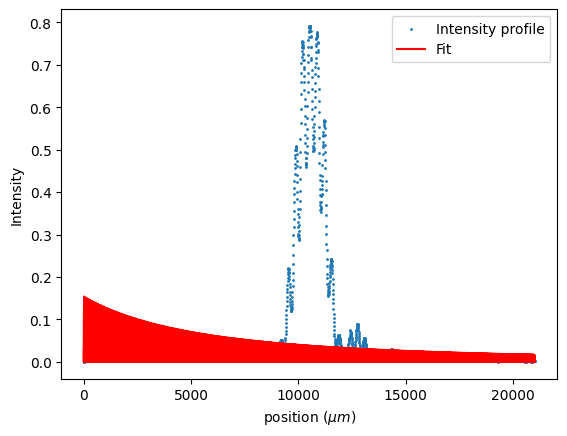

In [ ]:
plt.scatter(task2_pos+10514.0,task2_int,s = 1, label = 'Intensity profile')
plt.plot(xs+10514.0, fit(xs+10514.0, popt3[0],popt3[1],popt3[2]), c = 'r', label = 'Fit')
plt.xlabel('position ($μm$)')
plt.ylabel('Intensity')
plt.legend()
plt.savefig('failedfit', dpi = 500)

In [ ]:
#Fourier

In [ ]:
task2_int_fft = np.abs(fftpack.fft(task2_int))
dx = task2_pos[1]-task2_pos[0]
freq = fftpack.fftfreq(len(task2_pos),dx)

(-0.02, 0.02)

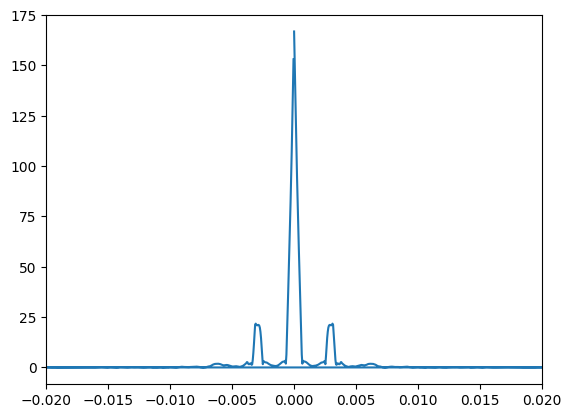

In [ ]:
plt.plot(freq,task2_int_fft)
plt.xlim(-0.02,0.02)

In [ ]:
peaks_fft, _ = find_peaks(task2_int_fft, distance = 600)
peaks_fft

array([  65,  687, 1513, 2313, 2935])

In [ ]:
print(task2_int_fft[peaks_fft])
print(freq[peaks_fft])

[21.76983666  0.09732533  0.18400575  0.09732533 21.76983666]
[ 0.00309524  0.03271429 -0.07080952 -0.03271429 -0.00309524]
